# Images analysis

In [1]:
import os
import torch
import numpy as np
import torchvision.transforms as transforms

from PIL import Image
from torch.utils.data import BatchSampler
from torch.utils.data import Dataset, DataLoader
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
def collate_fn(batch):
        # Convert the batch of images and annotations to tensors
        images = []
        annotations = []
        for img, annotation in batch:
            images.append(img)
            annotations.append(annotation)
        images = torch.stack(images, dim=0)
        return images, annotations

In [15]:
from src.data.dataloader import *
import torchvision.datasets as datasets

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Instantiate the dataset and dataloader
dataset_train = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'train', transform=None)
taco_dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True, collate_fn=collate_fn)

dataset_test = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'test', transform=transform)
taco_dataloader_test = DataLoader(dataset_test, batch_size=32, shuffle=True, collate_fn=collate_fn)

dataset_val = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'val', transform=transform)
taco_dataloader_val = DataLoader(dataset_val, batch_size=32, shuffle=True, collate_fn=collate_fn)

Reading annotations file: /work3/s212725/WasteProject/data/annotations_0_train.json
Reading annotations file: /work3/s212725/WasteProject/data/annotations_0_test.json
Reading annotations file: /work3/s212725/WasteProject/data/annotations_0_val.json


In [16]:
image, anns = dataset_train[0]

In [19]:
print(image)

<PIL.Image.Image image mode=RGB size=4160x3120 at 0x7F24064768F0>


In [20]:
print(anns['boxes'])
x = int(anns['boxes'][0][0])
y = int(anns['boxes'][0][1])
width = int(anns['boxes'][0][2])
height = int(anns['boxes'][0][3])

tensor([[1737., 1019., 1411.,  781.]])


ValueError: axes don't match array

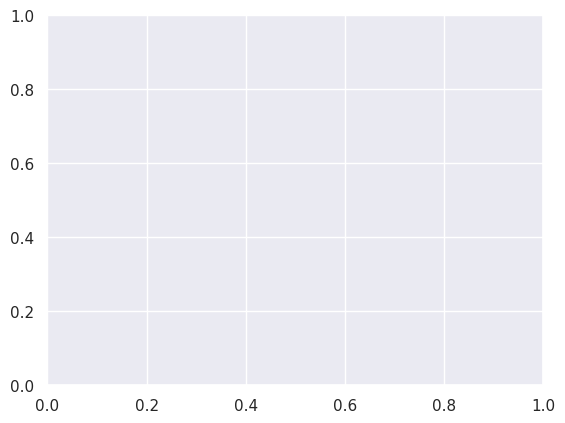

In [27]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt

# Create figure and axes objects
fig, ax = plt.subplots()

image, anns = dataset_train[0]
img = np.array(image.getdata())
image_array = np.transpose(img, (1, 2, 0))
# Display the image
ax.imshow(image_array)

x = int(anns['boxes'][0][0])
y = int(anns['boxes'][0][1])
width = int(anns['boxes'][0][2])
height = int(anns['boxes'][0][3])

# Create a Rectangle patch
rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the axes
ax.add_patch(rect)

# Show the plot
plt.show()